<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd
import numpy as np

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
print('Missing Values')
auto.isna().sum()

Missing Values


mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

There are 5 missing values comming from the `horsepower` columns.

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
is_NaN = auto.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = auto[row_has_NaN]
rows_with_NaN

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


## There could be multiple reasons on why the data is missing, such as:
- The data was simply not inputted from the beginning.

<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [4]:
columns = auto.columns.to_list()

#For loop to check each column for missing values
for i in columns:
    HasNan = np.isnan(auto.loc[:,i]) #Find the terms in each column that have nan values
    Median  = np.nanmedian(auto.loc[:,i]) #Determine the median value for each numeric column
    auto.loc[HasNan, i] = Median

#Stop check to verify the transformation
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

## Is this a good approach to fix the missing value problem?

The answer depends on many things but mostly it is related to domain knowledge of the data. In some cases this is the best option, compared to either eliminating the whole row or imputing using the mean. In the former the issue is that the mean is sensible to outliers which could potentially change the results of the analysis.

## Data Exploration

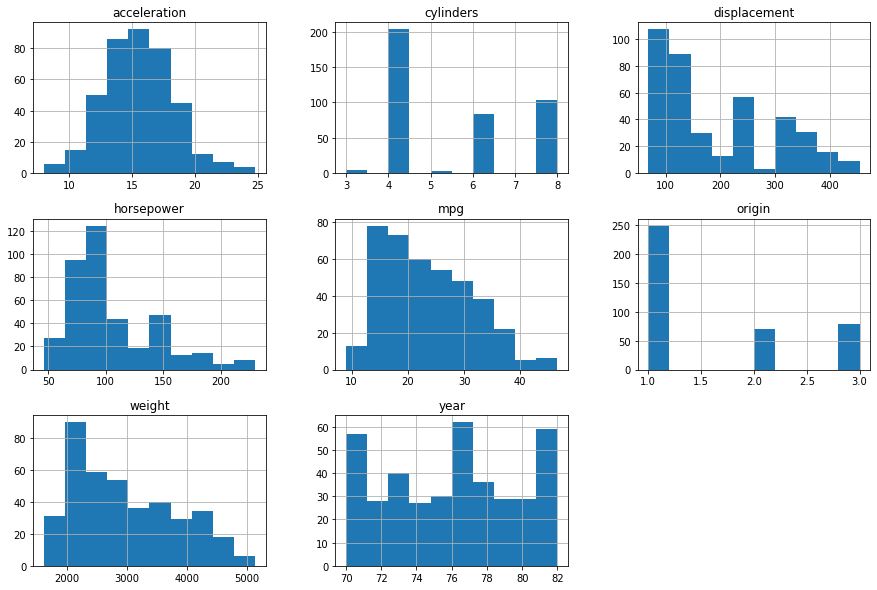

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Exploring distribution of the data available
auto.hist(figsize = (15,10))
plt.show()

In [6]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.331234,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.266994,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


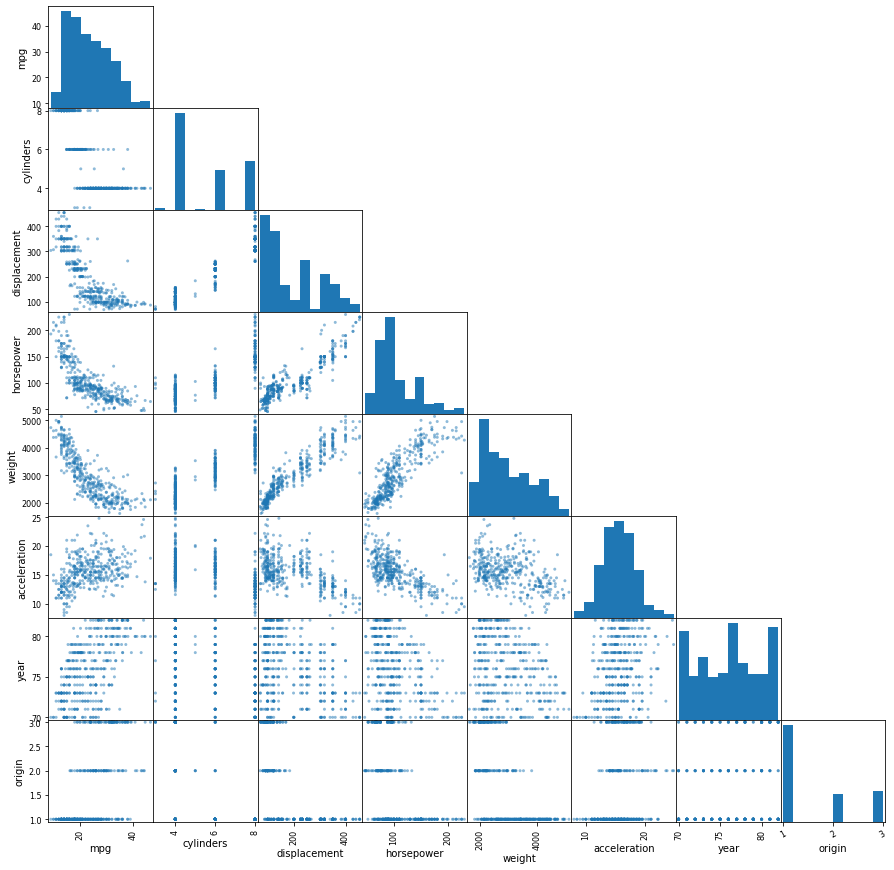

In [7]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(auto, figsize = (15,15),diagonal='hist', alpha=0.5)

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
            
plt.xticks(rotation=30)
plt.yticks(rotation=45)
plt.show()

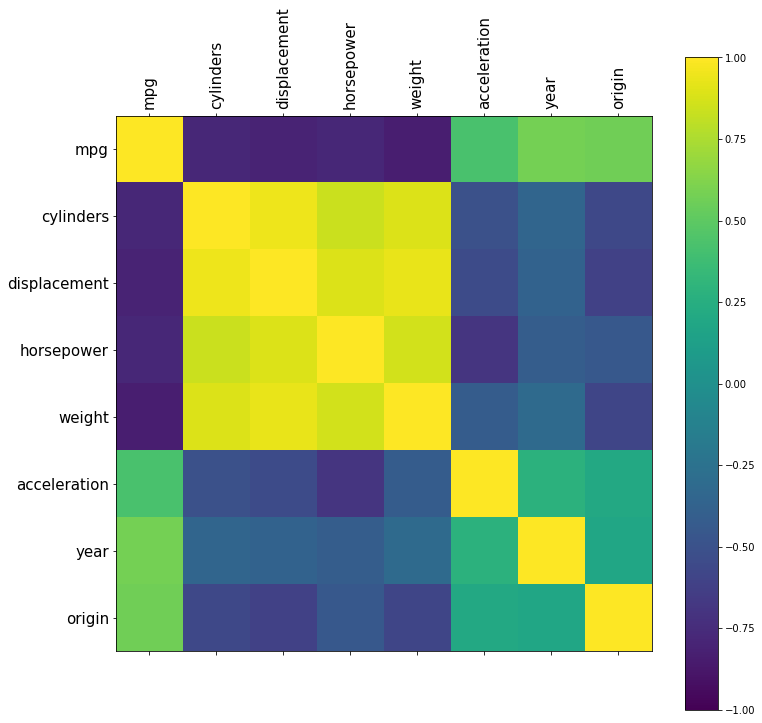

In [8]:
#Correlation plots for all the numerical features
correlations = auto.corr()
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns, fontsize = 15, rotation=90)
ax.set_yticklabels(columns, fontsize = 15)
plt.show()

<h3>Q.4. Develop a Linear Regression model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#Splitting the data between inputs and target
columns.remove('mpg')
attributes = auto[columns]
target = auto['mpg']

#Normalizing the data
scaler = StandardScaler()
scaler.fit(attributes)
attributes = scaler.transform(attributes)

#Sklearn regression instance  
regression_model = LinearRegression()
multi_model_sk = regression_model.fit(attributes, target)

In [10]:
#Stats the regression instance
import statsmodels.api as sm

Attributes = sm.add_constant(attributes) # adding a constant
multi_model_st = sm.OLS(target, Attributes).fit()

print(multi_model_st.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          2.22e-141
Time:                        13:08:25   Log-Likelihood:                -1037.3
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5159      0.167    140.534      0.0

## Summarize it and comment on its quality.

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution.</h3>

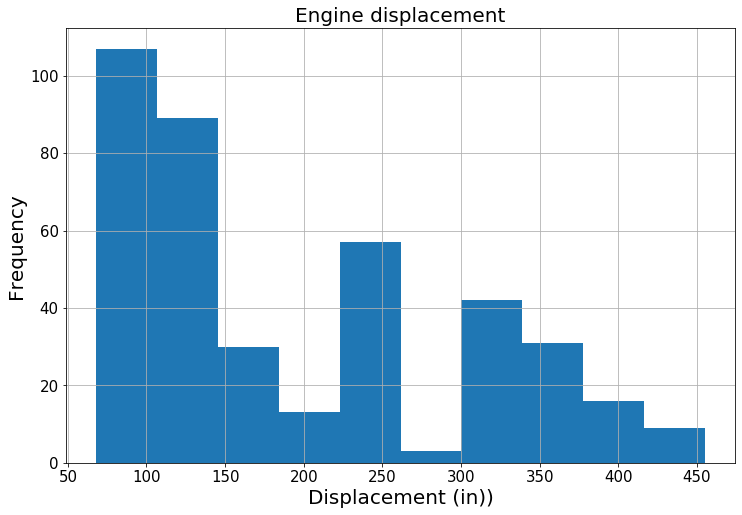

In [11]:
auto['displacement'].hist(figsize = (12,8))
plt.xlabel('Displacement (in))', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Engine displacement', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

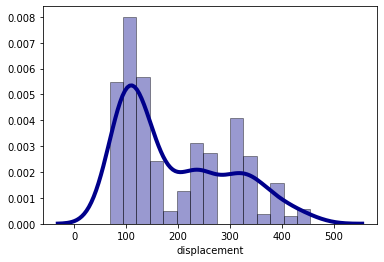

In [12]:
# Density Plot and Histogram of all arrival delays
sns.distplot(auto['displacement'], hist=True, kde=True, 
             bins=15, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<h3>Q.6. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

In [13]:

# Plot histogram of this new feature to reveal normal-like distribution

<h3>Q.7. Recalculate the Linear Regression model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [14]:
# Calculate then new model

# Comment on its performance
#

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the Linear Regression model, comment on its performance.</h3>

In [15]:
# Center and scale

# Recalculate the model

# Comment on its performance


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [16]:
# enter summery here